In [48]:
import cv2
import numpy as np 
import pandas as pd
import PIL 
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf 
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Dropout
from keras.models import Sequential 
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.utils import to_categorical 

In [2]:
data_dir = "/kaggle/input/animal-image-classification-dataset/Animals"
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3000

In [4]:
cats = list(data_dir.glob("cats/*"))
print(len(cats))

dogs = list(data_dir.glob("dogs/*"))
print(len(dogs))

snakes = list(data_dir.glob("snakes/*"))
print(len(snakes))

1000
1000
1000


In [5]:
features = {
    "cats": cats,
    "dogs": dogs,
    "snakes": snakes
}

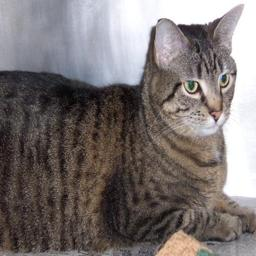

In [6]:
PIL.Image.open(str(features["cats"][0]))

In [ ]:
PIL.Image.open(str(features["dogs"][0]))

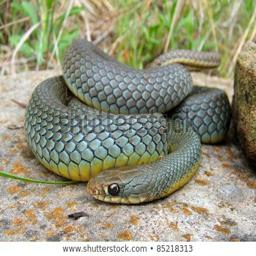

In [22]:
PIL.Image.open(str(features["snakes"][0]))

In [9]:
labels = {
    "cats": 0,
    "dogs": 1,
    "snakes": 2
}

In [10]:
for name, images in features.items():
    print(name)
    print(len(images))

cats
1000
dogs
1000
snakes
1000


In [11]:
def spliter():
    x = []
    y = []
    for name, images in features.items():
        for image in images:
            image = cv2.imread(str(image))
            resized_image = cv2.resize(image, (160, 160))
            x.append(resized_image)
            y.append(labels[name])
    return x, y

In [12]:
x, y = spliter()

cat


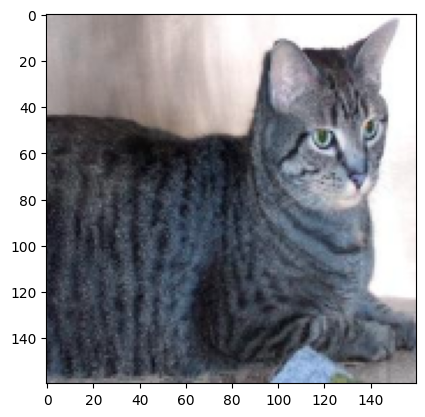

In [13]:
for i in range(1):
    lst = ["cat", "dog", "snake"]
    plt.imshow(x[i])
    print(lst[y[i]])
    plt.show()

dog


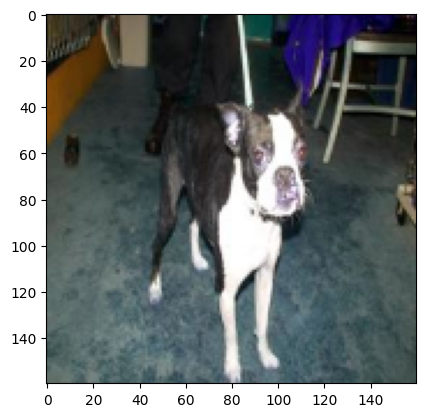

In [14]:
for i in range(1):
    lst = ["cat", "dog", "snake"]
    plt.imshow(x[1000 + i])
    print(lst[y[1000 + i]])
    plt.show()

snake


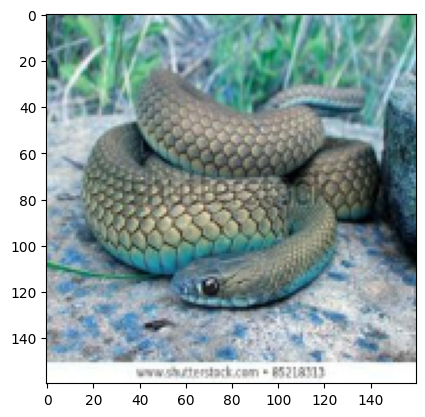

In [23]:
for i in range(1):
    lst = ["cat", "dog", "snake"]
    plt.imshow(x[2000 + i])
    print(lst[y[2000 + i]])
    plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)


In [24]:
x_train = x_train / 255
x_test = x_test / 255

In [25]:
y_train

array([1, 0, 0, ..., 2, 2, 2])

In [26]:
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

height = 160
width = 160
chanels = 3 
num_classes = 3

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(height, width, chanels)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 102400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    26,214,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,618,755 (101.54 MB)

 Trainable params: 26,618,755 (101.54 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x_train, y_train_one_hot, epochs=100)

Epoch 1/100


2024-07-14 14:40:46.655075: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.37001, expected 3.78758
2024-07-14 14:40:46.655141: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 24: 4.82006, expected 4.23763
2024-07-14 14:40:46.655156: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 84: 4.29222, expected 3.70979
2024-07-14 14:40:46.655181: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 107: 4.66662, expected 4.08418
2024-07-14 14:40:46.655193: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 118: 4.6149, expected 4.03246
2024-07-14 14:40:46.655205: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 119: 4.60203, expected 4.0196
2024-07-14 14:40:46.655216: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 133: 4.5604, expected 3.97797
2024-07-14 14:40:46.655227: E external/local_xla

 5/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4009 - loss: 1.1175

I0000 00:00:1720968053.806554      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.3468 - loss: 1.1123
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3894 - loss: 1.0922
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4206 - loss: 1.0657
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4736 - loss: 1.0362
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4897 - loss: 1.0027
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5222 - loss: 0.9616
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5308 - loss: 0.9501
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5737 - loss: 0.9108
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5855 - loss: 0.8678
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6130 - loss: 0.8559
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6044 - loss: 0.8253
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy

In [30]:
model.evaluate(x_test, y_test_one_hot)

16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7158 - loss: 0.8693

2024-07-14 14:45:10.648902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.83487, expected 2.23884
2024-07-14 14:45:10.648958: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.78894, expected 4.19291
2024-07-14 14:45:10.648975: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.58291, expected 3.98688
2024-07-14 14:45:10.648994: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 4.32871, expected 3.73267
2024-07-14 14:45:10.649007: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 4.24408, expected 3.64804
2024-07-14 14:45:10.649017: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 4.44227, expected 3.84624
2024-07-14 14:45:10.649029: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 4.49192, expected 3.89588
2024-07-14 14:45:10.649039: E external/local_xla/xla

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7169 - loss: 0.8632


[0.8425692915916443, 0.7183333039283752]

In [31]:
y_pred = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [33]:
y_preds = []
for ar in y_pred:
    value = np.argmax(ar)
    y_preds.append(value)
y_preds = np.array(y_preds)

In [34]:
y_preds

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0,
       2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2,
       2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1,
       0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2,
       0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0,
       0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2,

In [35]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[135,  43,  10],
       [ 65, 127,  10],
       [ 20,  21, 169]])

<Axes: >

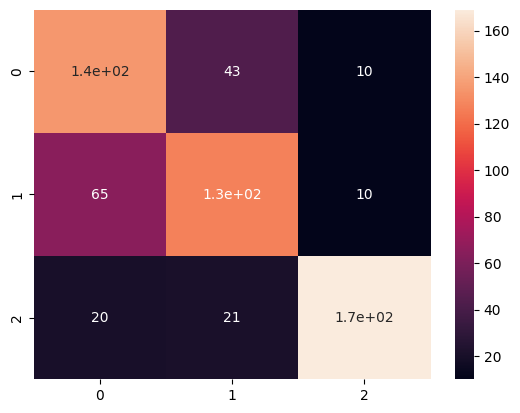

In [47]:
sns.heatmap(cm, annot=True)

In [36]:
x_test[0]

array([[[0.49803922, 0.50196078, 0.51764706],
        [0.49411765, 0.49803922, 0.51372549],
        [0.49803922, 0.50196078, 0.51764706],
        ...,
        [0.40784314, 0.47058824, 0.53333333],
        [0.40392157, 0.46666667, 0.52941176],
        [0.40392157, 0.46666667, 0.52941176]],

       [[0.49803922, 0.50196078, 0.51764706],
        [0.49411765, 0.49803922, 0.51372549],
        [0.49803922, 0.50196078, 0.51764706],
        ...,
        [0.41176471, 0.47058824, 0.53333333],
        [0.40784314, 0.46666667, 0.52941176],
        [0.40784314, 0.46666667, 0.52941176]],

       [[0.49803922, 0.50196078, 0.51764706],
        [0.49411765, 0.49803922, 0.51372549],
        [0.50196078, 0.50588235, 0.52156863],
        ...,
        [0.41176471, 0.47058824, 0.53333333],
        [0.40784314, 0.46666667, 0.52941176],
        [0.40784314, 0.46666667, 0.52941176]],

       ...,

       [[0.23921569, 0.37254902, 0.50196078],
        [0.23921569, 0.37254902, 0.50196078],
        [0.24705882, 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
dog


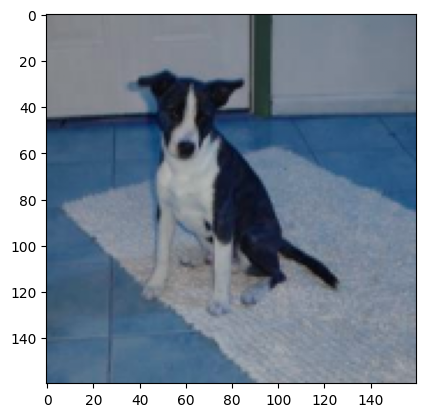

In [45]:
lst = ["cat", "dog", "snake"]
input_image = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(input_image)

np.argmax(prediction)
print(lst[np.argmax(prediction)])
plt.imshow(x_test[0])

In [49]:
joblib.dump(model, "animals_NN.pkl")

['animals_NN.pkl']